## **This is the notebook where I am training model**

In [17]:
import pandas as pd
import numpy as np 


df = pd.read_csv("./Data/spam.csv", encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
df['Unnamed: 2'].isna().sum()

5522

In [19]:
df.shape

(5572, 5)

In [20]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [21]:
new_df=df.drop("Unnamed: 4",axis=1)
new_df=new_df.drop("Unnamed: 3",axis=1)
new_df=new_df.drop("Unnamed: 2",axis=1)

In [22]:
df=new_df

In [23]:
df.sample()

,v1,v2
1506,spam,Thanks for the Vote. Now sing along with the s...


In [24]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [25]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Now we can also replace the spam and ham with the label encoder

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df.target=encoder.fit_transform(df.target)

In [27]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


we can note that spam is 1 and ham is 0 now

check for the duplicate value

In [28]:
df.duplicated().sum()

403

okay now removing the duplicated values

In [29]:
df.drop_duplicates(keep='first',inplace=True)

In [30]:
df.shape

(5169, 2)

Cleaning done now **EDA**

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

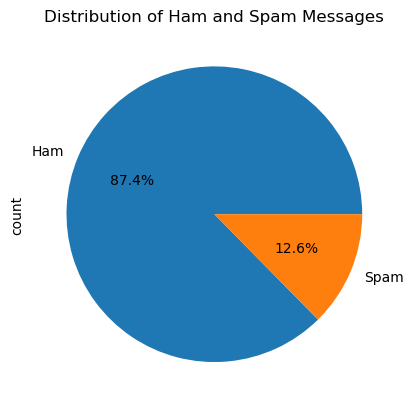

In [33]:
df['target'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Ham', 'Spam'])
plt.title('Distribution of Ham and Spam Messages')
plt.show()

here we can conclude that data is not balanced as 87% is ham 

## **NLP**

In [34]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Samee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
df["num_characters"]=df.text.apply(len)

In [36]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [37]:
df["num_words"]=df.text.apply(lambda x:len(nltk.word_tokenize(x)))

In [38]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [39]:
df["num_sentence"]=df.text.apply(lambda x:len(nltk.sent_tokenize(x)))


In [40]:
df

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [41]:
df.describe()

,target,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [42]:
ham_df=df[df.target==0]

In [43]:
ham_df.describe()

,target,num_characters,num_words,num_sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [44]:
spam_df=df[df.target==1]
spam_df.describe()

,target,num_characters,num_words,num_sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


c:\Users\Samee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Samee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


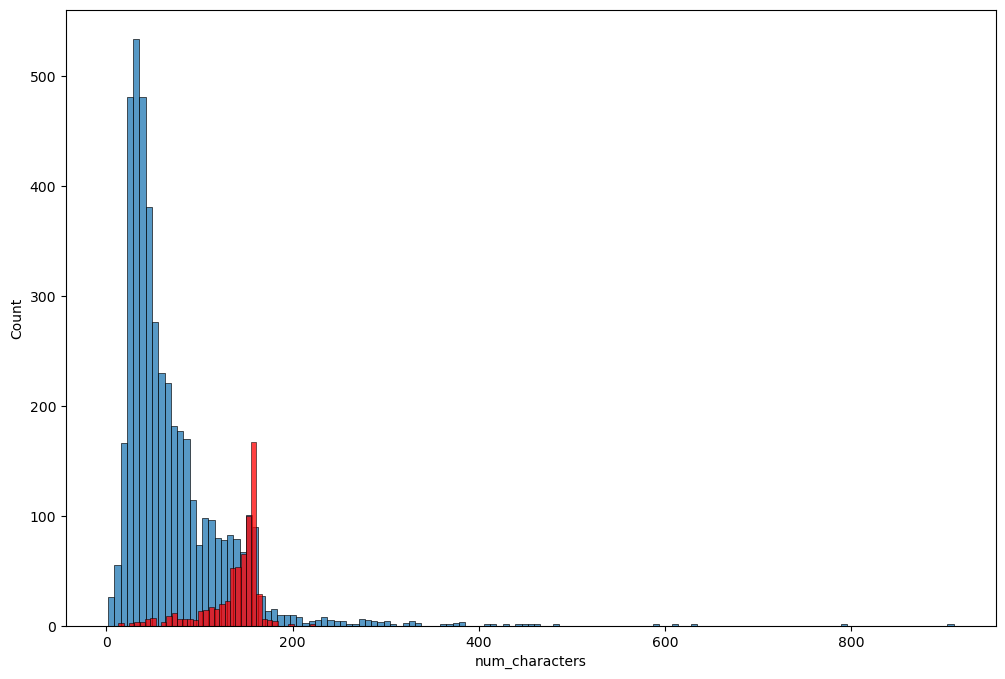

In [45]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(ham_df.num_characters)
sns.histplot(spam_df.num_characters,color="red")
plt.show()

c:\Users\Samee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Samee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Samee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


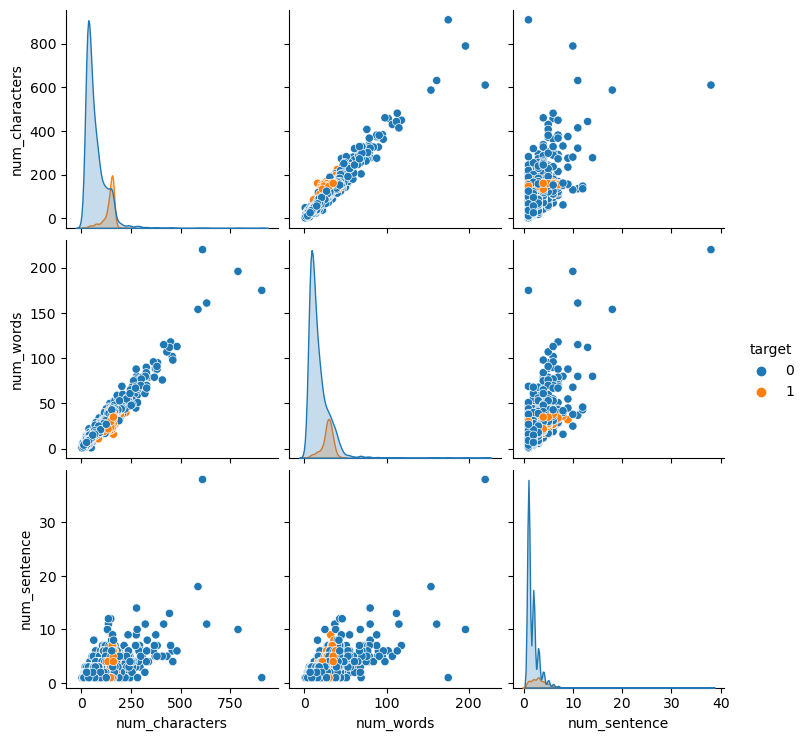

In [46]:
sns.pairplot(df,hue='target')
plt.show()

Text preprocessing 

- lower case
- tokenize
- removing special charactres
- removing stop words
- Stemming

In [47]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer


In [48]:
ps=PorterStemmer()
print(ps.stem("dancing"))

danc


In [49]:
def transfor_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y.copy()
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y.copy()
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [50]:
transfor_text("Hello World 88% how are you? loving you ")

'hello world 88 love'

In [51]:
df["transformed_text"]=df.text.apply(transfor_text)

In [52]:
df

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [53]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

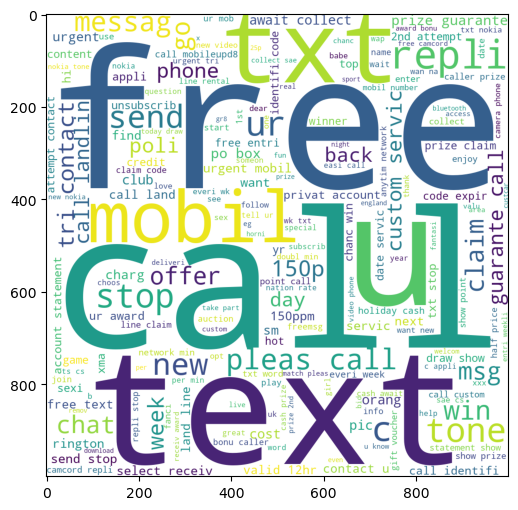

In [54]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

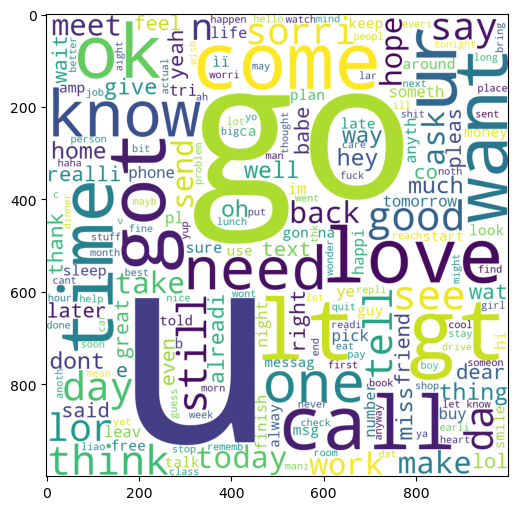

In [55]:
spam_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

In [56]:
df

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


## **Model Building**

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()

In [61]:
df

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [62]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [65]:
X.shape

(5169, 6708)

In [66]:
y=df['target'].values

In [67]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

X_train,X_test,y_train,y_test=train_test_split (X,y,random_state=2,test_size=0.2)



In [74]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

### **Gaussian algo**

In [86]:
gnb.fit(X_train,y_train)

y_pred1=gnb.predict(X_test)
print("accuracy_score")
print(accuracy_score(y_test,y_pred1))
print(50*"*")
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred1))
print(50*"*")
print("precision_score")
print(precision_score(y_test,y_pred1))
print(50*"*")


accuracy_score
0.8800773694390716
**************************************************
confusion_matrix
[[792 104]
 [ 20 118]]
**************************************************
precision_score
0.5315315315315315
**************************************************


### **Multinomial algo**

In [88]:
mnb.fit(X_train,y_train)

y_pred2=mnb.predict(X_test)
print("accuracy_score")
print(accuracy_score(y_test,y_pred2))
print(50*"*")
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred2))
print(50*"*")
print("precision_score")
print(precision_score(y_test,y_pred2))
print(50*"*")


accuracy_score
0.9642166344294004
**************************************************
confusion_matrix
[[871  25]
 [ 12 126]]
**************************************************
precision_score
0.8344370860927153
**************************************************


### **bernoulli algo**

In [89]:
bnb.fit(X_train,y_train)

y_pred3=bnb.predict(X_test)
print("accuracy_score")
print(accuracy_score(y_test,y_pred3))
print(50*"*")
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred3))
print(50*"*")
print("precision_score")
print(precision_score(y_test,y_pred3))
print(50*"*")


accuracy_score
0.9700193423597679
**************************************************
confusion_matrix
[[893   3]
 [ 28 110]]
**************************************************
precision_score
0.9734513274336283
**************************************************


Clearly seen that Gaussian also is working fine

### again training with TF vectorizer

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid=TfidfVectorizer()
X=tfid.fit_transform(df['transformed_text']).toarray()

In [91]:
X_train,X_test,y_train,y_test=train_test_split (X,y,random_state=2,test_size=0.2)

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [92]:
gnb.fit(X_train,y_train)

y_pred1=gnb.predict(X_test)
print("accuracy_score")
print(accuracy_score(y_test,y_pred1))
print(50*"*")
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred1))
print(50*"*")
print("precision_score")
print(precision_score(y_test,y_pred1))
print(50*"*")


accuracy_score
0.8762088974854932
**************************************************
confusion_matrix
[[793 103]
 [ 25 113]]
**************************************************
precision_score
0.5231481481481481
**************************************************


In [93]:
mnb.fit(X_train,y_train)

y_pred2=mnb.predict(X_test)
print("accuracy_score")
print(accuracy_score(y_test,y_pred2))
print(50*"*")
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred2))
print(50*"*")
print("precision_score")
print(precision_score(y_test,y_pred2))
print(50*"*")


accuracy_score
0.9593810444874274
**************************************************
confusion_matrix
[[896   0]
 [ 42  96]]
**************************************************
precision_score
1.0
**************************************************


In [94]:
bnb.fit(X_train,y_train)

y_pred3=bnb.predict(X_test)
print("accuracy_score")
print(accuracy_score(y_test,y_pred3))
print(50*"*")
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred3))
print(50*"*")
print("precision_score")
print(precision_score(y_test,y_pred3))
print(50*"*")


accuracy_score
0.9700193423597679
**************************************************
confusion_matrix
[[893   3]
 [ 28 110]]
**************************************************
precision_score
0.9734513274336283
**************************************************


As we know that our data is not balanced so we can take the model with the 0 FP rate as accuracy don't matter more here 

## other models

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

models = {
    "MultinomialNB": mnb,
    "BernoulliNB": bnb,
    "GaussianNB": gnb,
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "LinearSVC": LinearSVC()
}

results = []

for name, model in models.items():
    if name in ["MultinomialNB", "BernoulliNB", "GaussianNB"]:
        clf = model
    else:
        clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc, "Precision": prec})

results_df = pd.DataFrame(results).sort_values(by=["Accuracy", "Precision"], ascending=False).reset_index(drop=True)
print(results_df)

                Model  Accuracy  Precision
0        RandomForest  0.976789   1.000000
1           LinearSVC  0.974855   0.966667
2         BernoulliNB  0.970019   0.973451
3       MultinomialNB  0.959381   1.000000
4        DecisionTree  0.957447   0.850746
5  LogisticRegression  0.947776   0.988372
6          GaussianNB  0.876209   0.523148


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid=TfidfVectorizer(max_features=3000)
X=tfid.fit_transform(df['transformed_text']).toarray()
X_train,X_test,y_train,y_test=train_test_split (X,y,random_state=2,test_size=0.2)
mnb.fit(X_train,y_train)

y_pred2=mnb.predict(X_test)
print("accuracy_score")
print(accuracy_score(y_test,y_pred2))
print(50*"*")
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred2))
print(50*"*")
print("precision_score")
print(precision_score(y_test,y_pred2))
print(50*"*")


accuracy_score
0.9709864603481625
**************************************************
confusion_matrix
[[896   0]
 [ 30 108]]
**************************************************
precision_score
1.0
**************************************************
